# Preceptual Bistability

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')
score = np.array([0., 0.])

## Exercise 1.1

Write a function $laing\_chow$ which implements eqs. (1-4) from Laing and Chow (2002) and which can be given to $scipy.integrate.odeint$ as its first argument. 

The parameters of the model should be additional arguments of $laing\_chow$ such that you can investigatethe behavior of the model for different parameter settings. 

Reproduce qualitatively Fig. 9 of Laing and Chow (2002) by integrating the differential equation defined by $laing\_chow$ using $odeint(laing\_chow, x0, t, args=(I_1, I_2))$ where $x0$ should contain the initial values $ u_1 = 1, a_1 = 0.1 u_2 = 0, a_2 = 0.25$, $t$ should range from $0$ to $500$, $I$ are the inputs with $I_1 = 0.43, I_2 = 0.5$ and all other parameters of the model should be set by default to $\alpha = 0.2, \beta = 0.4, \varphi = 0.4, \tau = 20, g1 = g2 = 1$ in laing chow.

In [31]:
def heaviside(x): 
    if x>=0:
        return 1
    else:
        return 0
def laing_chow(y,t,I1,I2): 
    u1,a1,u2,a2 = y
    alpha, beta = 0.2, 0.4
    g1 = g2 = 1
    phi, tau = 0.4, 20
    du1 = -u1 + heaviside(alpha*g1*u1 -beta*g2*u2 -a1 + I1)
    du2 = -u2 + heaviside(alpha*g2*u2 -beta*g1*u1 -a2 + I2)
    da1 = 1/tau * (-a1 + phi*heaviside(alpha*g1*u1 -beta*g2*u2 -a1 + I1))
    da2 = 1/tau * (-a2 + phi*heaviside(alpha*g2*u2 -beta*g1*u1 -a2 + I2))    
    return [du1,da1,du2,da2]

In [32]:
def plot_resolution(ans_y,t): 
    u1,a1,u2,a2 = ans_y.T
    plt.figure(figsize=(15, 5))
    plt.suptitle("Solution for the reduced model (1) through (4)", fontsize=14)
    plt.subplot(211)
    plt.plot(t, u1, 'b')
    plt.plot(t, a1, 'g')
    plt.ylim((-0.2, 1.2))
    plt.legend(["u1", "a1"])
    plt.subplot(212)
    plt.plot(t, u2, 'b')
    plt.plot(t, a2, 'g')
    plt.ylim((-0.2, 1.2))
    plt.legend(["u2", "a2"])
    plt.xlabel("Time")

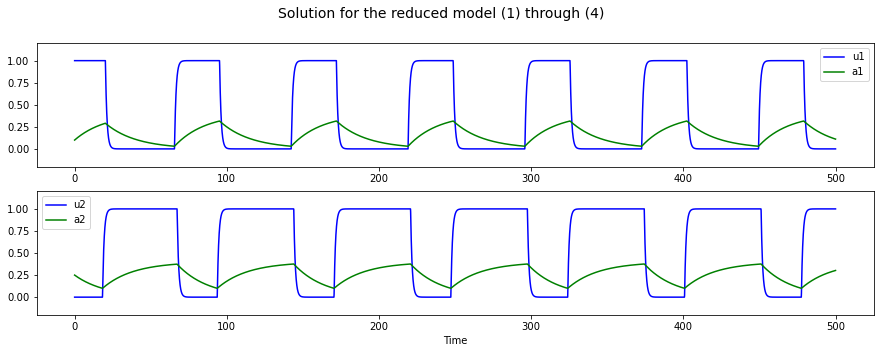

In [33]:
x0 = [1,0.1,0,0.25]
I1,I2 = 0.43,0.5
t = np.linspace(0,500,5001)
ans_y = odeint(laing_chow, x0, t, args=(I1, I2))
plot_resolution(ans_y,t)

## Exercise 1.2

Let us define population 1 as active if $u1 > u2$ and equivalently for population 2. Determine the dominance durations $D_1$ during which population 1 is active, from your simulations.

To do this write a function dominance durations $(x1, x2, t)$ where $x1$ and $x2$ are arrays containing the simulated states and $t$ is an array of the same length containing the corresponding times. 

The result should be an array containing the duration of each dominance period in the data. Why are the dominance durations different from the analytical $T_1(eq.9)$ in the paper?

In [34]:
def dominance_durations(x1, x2, t): 
    # get the dominance arrays
    dom = (x1 - x2)>0
    # find the shifts
    idx = np.where(np.diff(dom))[0]
    # add shifts at the beginning and end
    shifttimes = np.zeros(len(idx)+2)
    shifttimes[-1] = max(t)
    # add the shift times into the array
    shifttimes[1:-1] = t[idx]
    # who dominated first? 
    x1start = 0 if x1[0]>x2[0] else 1
    return np.diff(shifttimes)[x1start::2]

In [35]:
print(dominance_durations(ans_y[:,2], ans_y[:,0], t))

[47.1 48.7 48.8 48.8 48.7 48.7 20.8]


In [36]:
"""
def dominance_durations(x1, x2, t):
    x1_domperiod = np.zeros(10)
    k = 0
    count_x1dom = 0
    for i in range(np.size(t)):
        if x1[i]>x2[i]:
            count_x1dom = count_x1dom+1
        while (x1[i]<x2[i])and(x1[i-1]>x2[i-1]):
            x1_domperiod[k] = count_x1dom
            count_x1dom = 0
        if x1[i]<x2[i]:
            continue
    return xi_domperiod
"""

'\ndef dominance_durations(x1, x2, t):\n    x1_domperiod = np.zeros(10)\n    k = 0\n    count_x1dom = 0\n    for i in range(np.size(t)):\n        if x1[i]>x2[i]:\n            count_x1dom = count_x1dom+1\n        while (x1[i]<x2[i])and(x1[i-1]>x2[i-1]):\n            x1_domperiod[k] = count_x1dom\n            count_x1dom = 0\n        if x1[i]<x2[i]:\n            continue\n    return xi_domperiod\n'

<td bgcolor=lightblue><tr>
Here I have some questions:
1. I do not quiet understand the code in the solution provided, could you explain to me in detail about:
idx = np.where(np.diff(dom))[0]
shifttimes[-1] = max(t)
shifttimes[1:-1] = t[idx]
these three lines?
2. I used loop here which can be really slow while running ,do you have any advice on optimizing that？
    
    

<div class="alert alert-info">

<h3>Questions here:</h3>
    
<p>1. I could not fully understand the code in the solution.
    
   idx = np.where(np.diff(dom))[0]
    
   shifttimes[-1] = max(t)  
    
   shifttimes[1:-1] = t[idx]
   
These three lines. Could you please give me a more detailed explanation?</p>

<p>2. I have used a loop here but I found it really slow, is there any suggestion on optimizing it?</p>
</div>

### Question: Why are the dominance durations different from the analytical $T_1(eq.9)$ in the paper?

The results here comes from a very simple linear way in our programming since the equations for u does not contain any factor leads to an exp. However, the equation in the paper has taken a exp function to compute the growing and decaying phase. 

<div class="alert alert-info">
<h3>Question here: </h3>
<p>What does phi and alpha beta exactly means? I am still a little confused abut the physical background of the equations, is that what we commonly saw in the HH model? Is there any literature I can kook deeper in to(maybe just the ones for citation)?</p>
</div>

## Exercise 1.3

The paper states that, if the inputs are larger than $-\alpha+\beta+\varphi\$ , both populations become
active and oscillation will stop. 

Can you confirm this? What about intermediate input
values? Do the analytical dominance periods still fit the experimental results? How do
you interpret these results?

### a)populations and oscillation

In [37]:
# Now we set I1 I2 to a point larger than 0.6
x0 = [1, 0.1, 0, 0.25]
I1 = 0.6 + 0.02
I2 = 0.6 + 0.2
t = np.linspace(0,1000,5001)
ans_y = odeint(laing_chow, x0, t, args=(I1, I2))

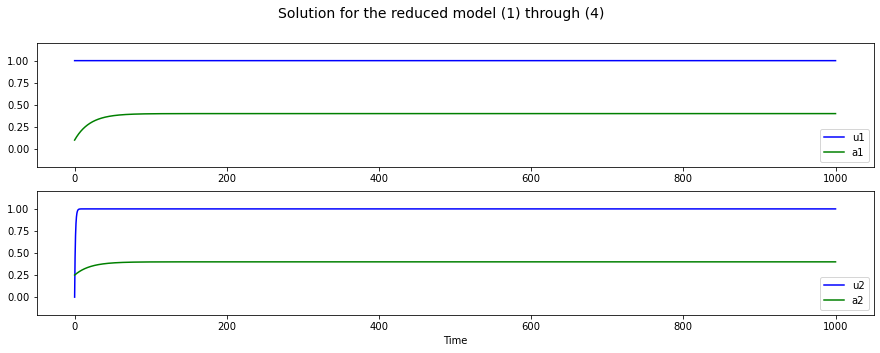

In [38]:
plot_resolution(ans_y,t)

### b)intermediate input values

In [39]:
x0 = [1, 0.1, 0, 0.25]
I1 = 0.525
I2 = 0.58
t = np.linspace(0,500,5001)
ans_y = odeint(laing_chow, x0, t, args=(I1, I2))

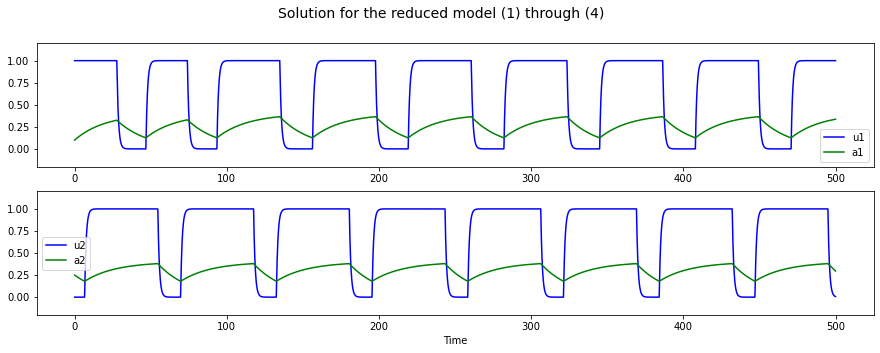

In [40]:
plot_resolution(ans_y,t)

As is shown in the fighre, a1 and a2 can dominate at the same time which does not match to the expectation.

### c)analytical and experimental results

In [41]:
print(dominance_durations(ans_y[:,0], ans_y[:,2], t))

[27.7 19.5 17.4 20.1 20.5 17.3  2.3 17.3  2.8 17.3  5. ]


In [42]:
#analytical results
alpha, beta = 0.2, 0.4
phi, tau = 0.4, 20
T1 = - tau * np.log((I2 - beta)/(beta + phi - I1))
print(T1)

8.476284935527225


We can see that the analytical result is much smaller than the experimental ones.



### d)interpretations for the results

For the ones in the steady state, the inhibition influence is not strong enough to affect popu.2.

<div class="alert alert-info">
<h3>Question here</h3>

<p>I am not very clear about the overlapping. I think it is because that the time is so short 
so it can not wait for one entirely changed then another comes in,
since this state is close to the border while the influence can not be efficient enough. But the discription in the solution confuses me a lot.</p>
    

</div>

Next we will investigate a model of perceptual bistability developed by Moreno-Bote et al. (2007).
The model is an attractor network that relies on noise to drive transitions between network states.
Once again, while they also present a spiking network model, we will consider only their meanfield firing rate model.

## Exercise 2.1

### Question: Why can’t you use $scipy.integrate.odeint$ to implement the model in $Moreno-Bote et al.
(2007)$?

Since here we have stochastic noise induced, the equations can not be solved as usual by the rules in ordinary DEQ. There should be some tricks to do for the noise which might change as the equation in a stable state.

## Exercise 2.2

You will have to write your own integration function. We will use the Euler-Maruyama method. 

Euler-Maruyama is an extension of the simple Euler method to stochastic differential equations where we here only consider Gaussian noise processes. Euler-Maruyama integrates differential equations of the form 

$dX(t) = f(X(t))dt + g(X(t))dW(t)$


here $f(X(t))$ is the deterministic part of the differential equation and $g(X(t))dW(t)$ is the stochastic part where $dW(t)$ is a random variable. Euler-Maruyama consists of the following update which your function has to implement:

$X_t = X_t-1 + f(X_t-1) \Delta t + g(X_t-1)\sqrt \Delta t W_t$

Each $W_t$ is a sample from a standard normal distribution. For more information about Euler-Maruyama see Higham (2001), or Wikipedia.
Write a function $euler\_maruyama(ffun, gfun, x0, t, **args)$ which implements this equation and which behaves like odeint.

Note that we have defined $args$ as a dictionary which difers from $odeint$ where $args$ is a tuple. This makes it easier to change individual parameters of the model functions later. Test your function by using $ffun=laing\_chow$ and $gfun=0$ (hint: you can implement $gfun$ compactly using Python’s lambda notation). For small enough time steps ($t = 0.1$ should be sucient) you should get the same results as with odeint.

In [43]:
def euler_maruyama(ffun, gfun, x0, t, **args): 
    dt = t[1]
    sqrtdt =np.sqrt(dt)
    f = np.zeros((len(x0), len(t))) 
    f[:,0] = ffun(x0, t, **args) 
    dW = sqrtdt*np.random.standard_normal((len(x0), len(t)))
    for i in range(len(t)-1):        
        f[:,i+1] = f[:,i] + np.asarray(ffun(f[:,i], t, **args))*dt + np.asarray(gfun(f[:,i]))*dW[:,i] #you have to use an array here
    return f

In [44]:
I1, I2 = 0.43, 0.5
x0 = [1, 0.1, 0, 0.25]
t = np.linspace(0,500,5001)
ans_y = euler_maruyama(laing_chow, lambda x: 0, x0, t, **dict([('I1',I1),('I2',I2)]))


[28.1 28.  28.  28.  28.  28. ]


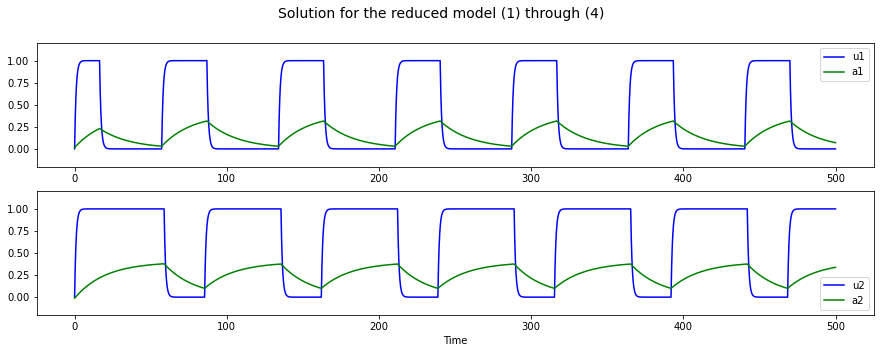

In [45]:
plot_resolution(ans_y.T, t)
print(dominance_durations(ans_y.T[:,0], ans_y.T[:,2],t))

<div class="alert alert-info">
<h3>Questions here</h3>
<p>1.Why my results are a little different from that in the solution?</p>
<p>2.I am really confused by the **args,why should it be like this while passing the dictionary from I1,I2 like this:</p>
    
<p>**dict([('I1',I1),('I2',I2)])</p>
    
<p>I have tried the standard ways to initiate the dictionary but it does not work:</p>
<p>like I just wrote {'I1':I1,'I2',I2} or just like the ones in the website realpython: (I1=I1,I2=I2) and I have noticed that in the after work there is always a ** before that, but why the example in the website does not contain that?</p>
    

</div>

## Exercise 2.3

 Make $ffun$ return 0 and $gfun$ return $1/\tau$ . Simulate this stochastic differential equation between $t = 0$ and $t = 5$ with $\Delta t$ = 0.01 for $\tau$ = 0.1 and for $\tau$ = 1. 

Further, simulate the stochastic differential equation with $gfun$ as before and $ffun=-x/\tau$ . Compare the results of the three simulations.

What is similar? What is different? (hint: look up Wiener processes and Ornstein-Uhlenbeck processes. Your answer should incorporate these terms.)


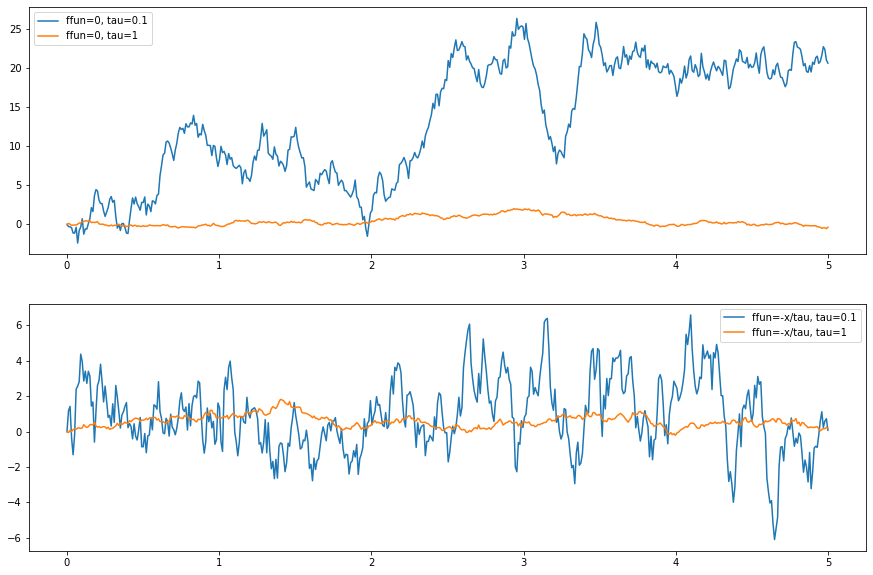

In [46]:
t = np.linspace(0, 5, 500)
x0 = [0]
tau1 = 0.1
tau2 = 1
ans_y1 = euler_maruyama(lambda x,t,**args:0, lambda x: 1/tau1, x0, t)
ans_y2 = euler_maruyama(lambda x,t,**args:0, lambda x: 1/tau2, x0, t)
ans_y3 = euler_maruyama(lambda x,t,**args:-1*np.array(x)/tau1, lambda x: 1/tau1, x0, t)
ans_y4 = euler_maruyama(lambda x,t,**args:-1*np.array(x)/tau2, lambda x: 1/tau2, x0, t)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t, ans_y1.T)
plt.plot(t, ans_y2.T)
plt.legend(["ffun=0, tau=0.1", "ffun=0, tau=1"])
plt.subplot(212)
plt.plot(t, ans_y3.T)
plt.plot(t, ans_y4.T)
plt.legend(["ffun=-x/tau, tau=0.1", "ffun=-x/tau, tau=1"]); 

<div class="alert alert-info">
<h3>A small request</h3>

<p>Due to reasons in time, I have not got enough time to dig out more about these two process, I hope to get the answer as soon as I finished  digging more and I would like to send you email if I got problems on the math.</p>
    

</div>

## Exercise 2.3

Finally, write functions $f\_moreno\_bote$ and $g\_moreno\_bote$ which implement equations $(A1, B5, B6, B7)$ of Moreno-Bote et al. (2007). (hint: note the stochastic part of the equations: only that goes into $g\_moreno\_ bote$.) 

Simulate for $t$ from 0 to 20 with $\Delta t = 0.01$ time units for the model using the same parameter settings as in the paper: $g_A = g_B = 0.05, \alpha = 0.75, \beta  = 0.5, \gamma = 0.1, \phi = 0.5, \tau = 0.01, \tau _a = \tau _b = 2, \tau _s = 0.1, \sigma = 0.03, \eta = 0.5, \theta = 0.1, k = 0.05$ and initial conditions $r_A = 1, r_B = 0.01, \alpha _A = 0, \alpha _B = 0.04, n_A = n_B = 0$.

Visualize the results using three subplots: rates, hyperpolarizing currents and noise.

In [47]:
def sigmoid(x, theta=0.1, k=0.05): 
    arg = (x-theta)/k
    return 1/(1+np.exp(-arg))

In [48]:
def f_moreno_bote(y, t, **args): 
    rA, alphaA, nA, rB, alphaB, nB = y
    val = phi*(rA + rB) + gA + gB
    r_pool = val if val>0 else 0 
    rAinh = np.power(r_pool + eta*rA, 2)
    rBinh = np.power(r_pool + eta*rB, 2)
    

    drA = 1/tau *(-rA + sigmoid(alpha*rA - beta*rAinh + gA - alphaA + nA))
    dalphaA = 1/tau_a *(-alphaA + gamma*rA)
    dnA = -nA/tau_s

   
    drB = 1/tau *(-rB + sigmoid(alpha*rB - beta*rBinh + gB - alphaB + nB))
    dalphaB = 1/tau_b *(-alphaB + gamma*rB)
    dnB = -nB/tau_s
    return [drA,dalphaA, dnA, drB, dalphaB, dnB]

def g_moreno_bote(y, **args): # only containing the stochastic parts
    noiseterm = sigma*np.sqrt(2/tau_s)
    return [0, 0, noiseterm, 0, 0, noiseterm]


In [49]:
def plot_moreno_results(my_ans, t): 
    rA = my_ans[:,0]
    alphaA = my_ans[:,1]
    nA = my_ans[:,2]
    rB = my_ans[:,3]
    alphaB = my_ans[:,4]
    nB = my_ans[:,5]
    val = phi*(rA + rB) + gA + gB
    r_pool = np.array([i if i>0 else 0 for i in val])
    rAinh = np.power(r_pool + eta*rA, 2)
    rBinh = np.power(r_pool + eta*rB, 2)
    plt.figure(figsize=(17,15))
    plt.suptitle("Solution of the Moreno Bote model", fontsize=16)
    plt.subplot(311)
    plt.plot(t, rA, 'b')
    plt.plot(t, rB, 'g')
    plt.ylim((-0.1, 1.1))
    plt.legend(["rA", "rB"])
    plt.title("Rates")
    plt.subplot(312)
    plt.plot(t, alphaA, 'b')
    plt.plot(t, alphaB, 'g')
    plt.legend(["alphaA", "alphaB"])
    plt.title("Hyperpolarizing currents")
    plt.subplot(313)
    plt.plot(t, nA, 'b')
    plt.plot(t, nB, 'g')
    plt.ylim((-.2, 1.2))
    plt.legend(["nA", "nB"])
    plt.xlabel("Time")
    plt.title("Noise"); 

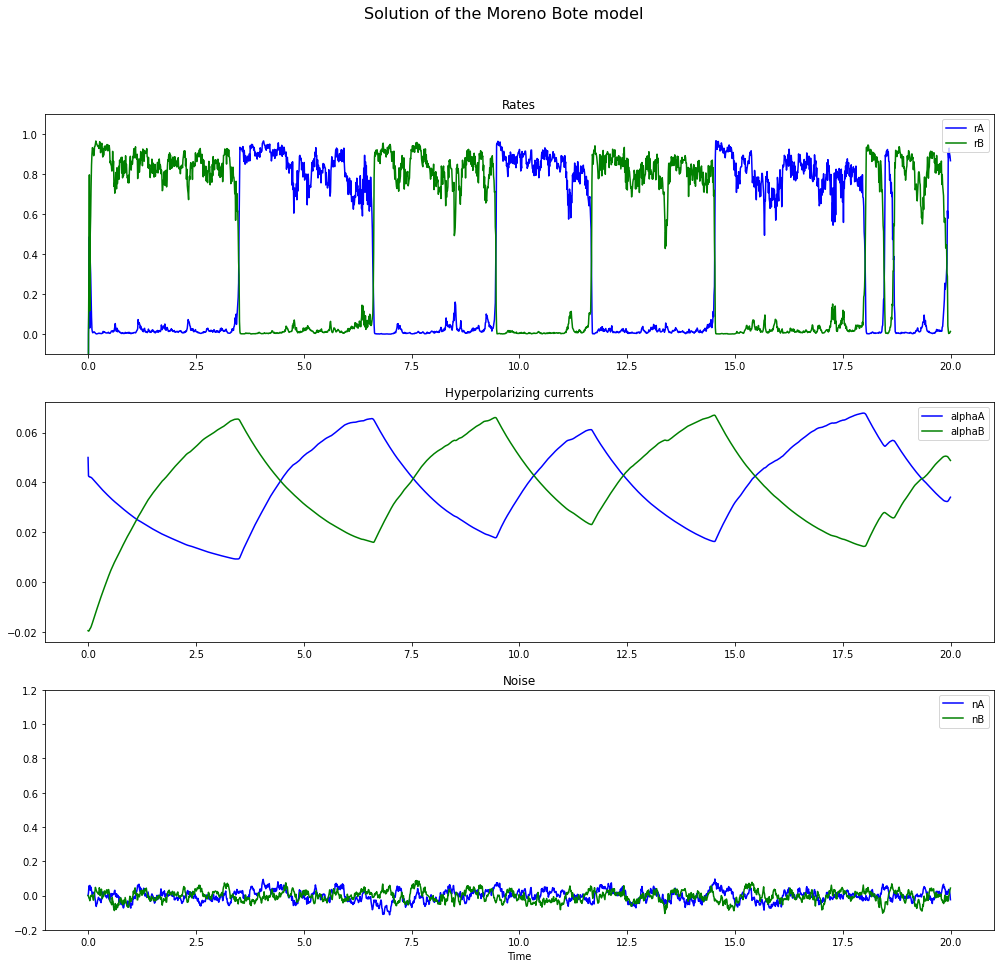

In [50]:
alpha, beta, gamma = 0.75, 0.5, 0.1    
eta = 0.5
gA = gB = 0.05
phi = 0.5
tau = 0.01
tau_s = 0.1
tau_a = tau_b = 2
sigma = 0.03

dt = 0.01
t = np.arange(0, 20, dt)
x0 = [1, 0, 0, 0.01, 0.04, 0]
my_ans = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t, **{'sigma':sigma, 'tau_s':tau_s})
plot_moreno_results(my_ans.T, t)

## Exercise 2.5

Now simulate for $t$ up to 500 (again with $\Delta t = 0.01$). Determine the dominance durations(if you implemented it correctly, you can simply use function $dominance\_ durations_ fromexercise 1).

Plot a histogram of the dominance durations.

What is their mean?

In [51]:
def plot_duration_hist(r1, r2): 
    r1dom = dominance_durations(r1, r2, t)
    r2dom = dominance_durations(r2, r1, t)
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.hist(r1dom, bins=15)
    plt.legend([ "histogram"])
    plt.title("Dominance durations for rA")
    plt.xlabel("Dominance duration")
    plt.ylabel("Counts")
    plt.subplot(122)
    plt.hist(r2dom, bins=15)
    plt.legend(["histogram"])    
    plt.title("Dominance durations for rB")
    plt.xlabel("Dominance duration");

Mean durations for gamma=0.1: 2.3147685185185187ms


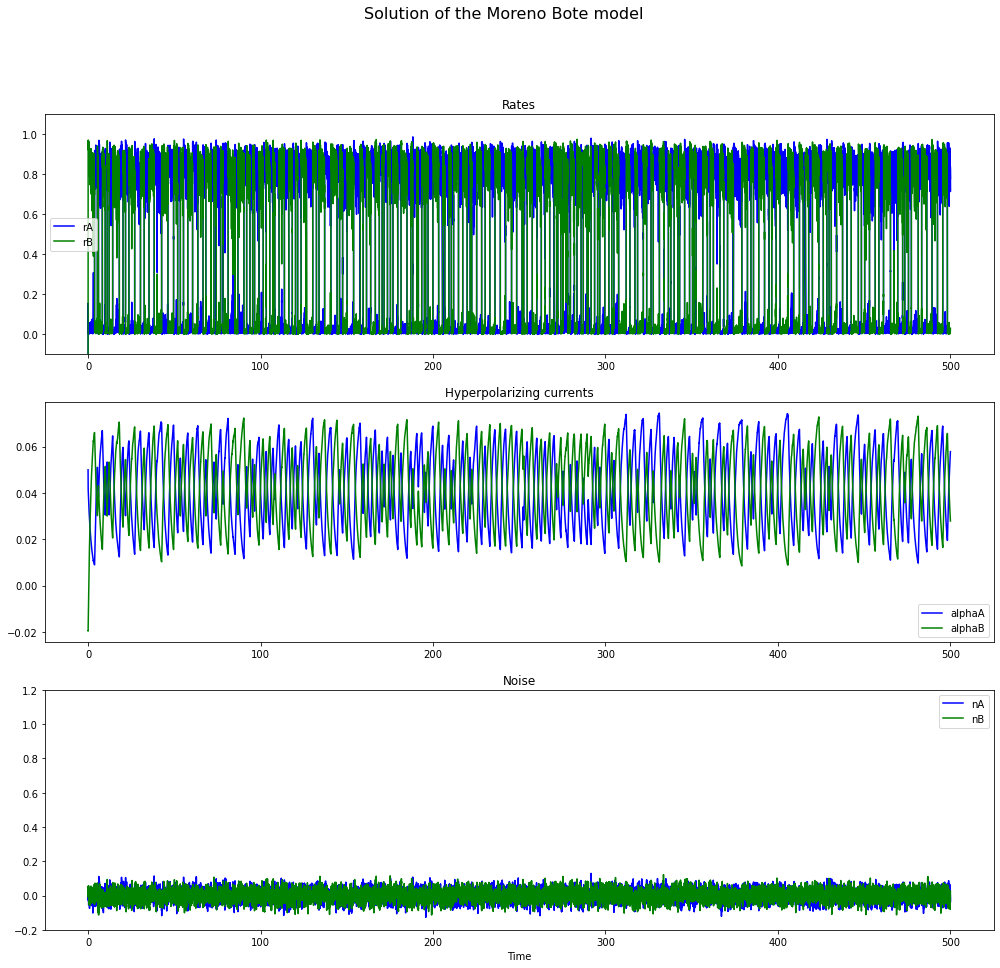

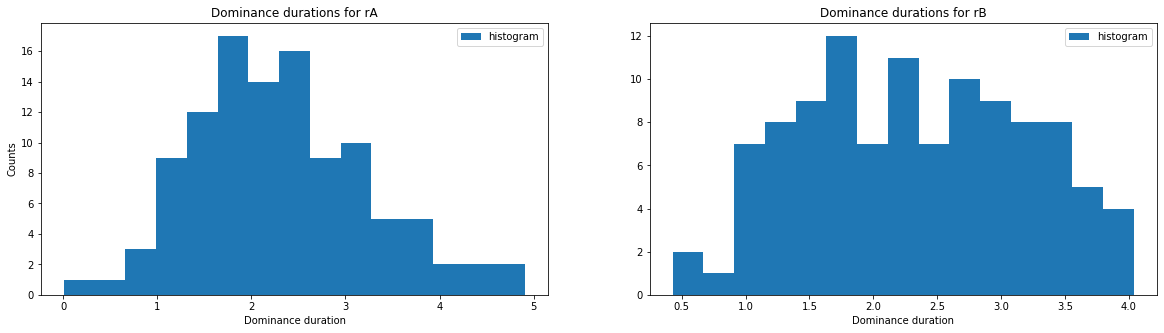

In [52]:
sigma = 0.03
gamma = 0.1
tau_s = 0.1
t = np.arange(0, 500, 0.01)
x0 = [1, 0, 0, 0.01, 0.04, 0]
my_ans = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t, **{'sigma':sigma, 'tau_s': tau_s})
plot_moreno_results(my_ans.T, t)
plot_duration_hist(my_ans.T[:,0], my_ans.T[:,3])
meanDur1 = np.mean(dominance_durations(my_ans.T[:,0], my_ans.T[:,3],t))
meanDur2 = np.mean(dominance_durations(my_ans.T[:,3], my_ans.T[:,0],t))
print("Mean durations for gamma={}: {}ms".format(gamma, np.mean([meanDur1, meanDur2])))

## Exercise 2.6

What is the influence of $\gamma$ in the model? How and why does the histogram change if you choose $\gamma$ = 0? Repeat your simulation with $\gamma$ = 0 and estimate the mean dominance duration.

Mean durations for gamma=0: 4.1665833333333335ms


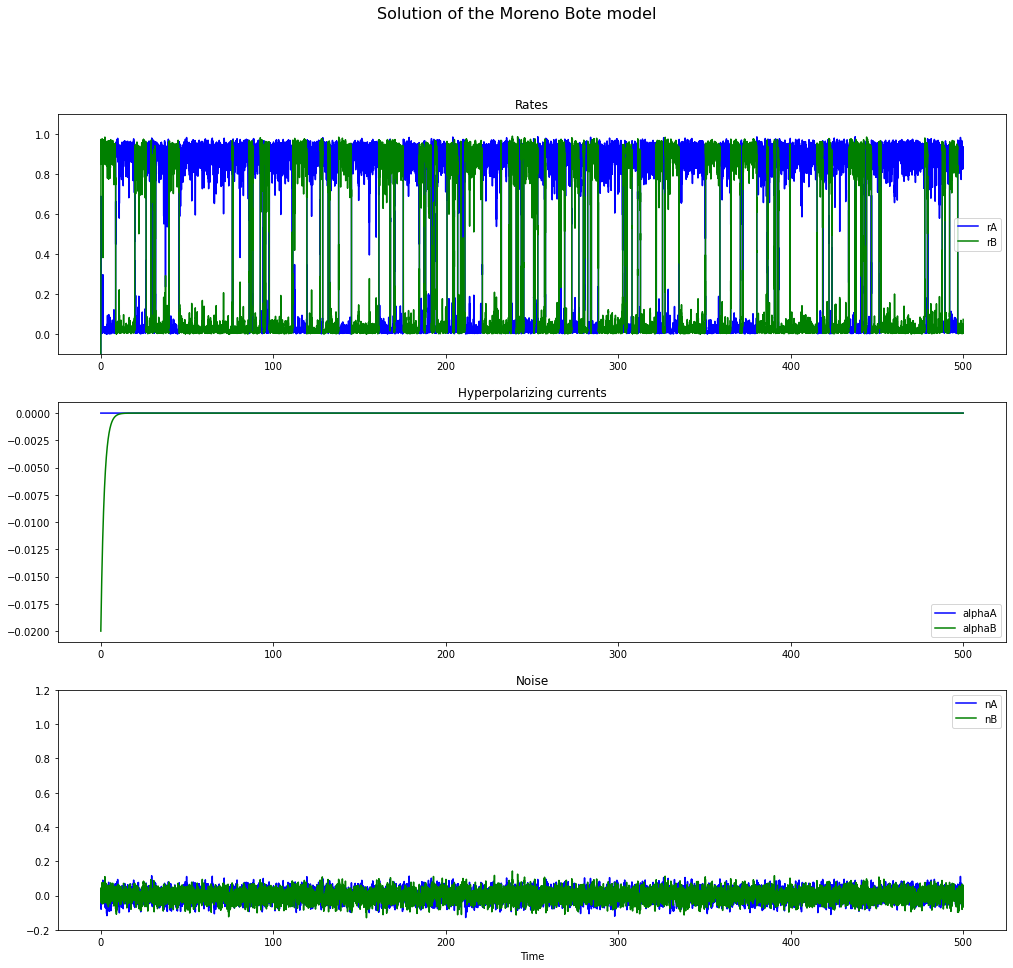

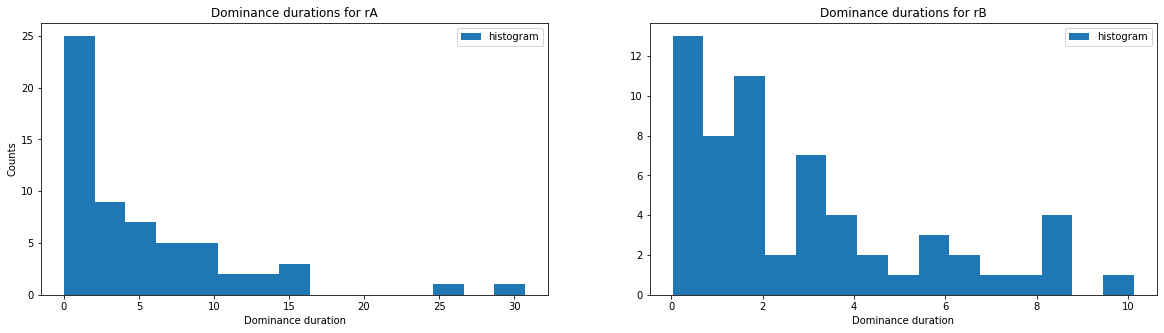

In [53]:
sigma = 0.03
gamma = 0
tau_s = 0.1
t = np.arange(0, 500, 0.01)
x0 = [1, 0, 0, 0.01, 0.04, 0]
my_ans2 = euler_maruyama(f_moreno_bote, g_moreno_bote, x0, t, **{'sigma':sigma, 'tau_s': tau_s})
plot_moreno_results(my_ans2.T, t)
plot_duration_hist(my_ans2.T[:,0], my_ans2.T[:,3])
meanDur1 = np.mean(dominance_durations(my_ans2.T[:,0], my_ans2.T[:,3],t))
meanDur2 = np.mean(dominance_durations(my_ans2.T[:,3], my_ans2.T[:,0],t))
print("Mean durations for gamma={}: {}ms".format(gamma, np.mean([meanDur1, meanDur2])))

#### Influence from gamma

$\gamma$ is in the opposite direction in chaging eith the dominance durations,i.e. the smaller it is, the longer the duration holds.

<div class="alert alert-info">
<h3>A second small request</h3>

<p>I have not finished the last part. I would like to send you emails if I met problems while solving it.</p>
    

</div>